In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('chess.csv')
data.head(2)

,game_id,rated,start_time,end_time,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1504210000000,1504210000000,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1504130000000,1504130000000,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   game_id         20058 non-null  object
 1   rated           20058 non-null  bool  
 2   start_time      20058 non-null  int64 
 3   end_time        20058 non-null  int64 
 4   turns           20058 non-null  int64 
 5   victory_status  20058 non-null  object
 6   winner          20058 non-null  object
 7   time_increment  20058 non-null  object
 8   white_id        20058 non-null  object
 9   white_rating    20058 non-null  int64 
 10  black_id        20058 non-null  object
 11  black_rating    20058 non-null  int64 
 12  moves           20058 non-null  object
 13  opening_eco     20058 non-null  object
 14  opening_name    20058 non-null  object
 15  opening_ply     20058 non-null  int64 
dtypes: bool(1), int64(6), object(9)
memory usage: 2.3+ MB


Opening_ECO: ECO stands for Encyclopedia of Chess Openings. It is a standardized code for any given chess opening. The chess openings are categorised into five broad areas ("A" through "E"), with each of those broken up into one hundred subcategories ("00" through "99"). <br>

Opneing Ply, refers to the number of half moves made in the opening of the game. A low opening ply like 4 or 5 would indicate that the opening phase of the game was brief or that the players deviated from the standard opening of early. While a high opening ply indicares a deeper adherence to established opening theory before new moves or errors.

In [4]:
#check the columnc in the data
data.columns

Index(['game_id', 'rated', 'start_time', 'end_time', 'turns', 'victory_status',
       'winner', 'time_increment', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

In [5]:
#check for missing data
data.isna().sum()

game_id           0
rated             0
start_time        0
end_time          0
turns             0
victory_status    0
winner            0
time_increment    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

In [6]:
data.set_index('game_id', inplace=True)

In [7]:
#describe the numeric data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
start_time,20058.0,1.483617e+12,2.850151e+10,1.376772e+12,1.477548e+12,1.496010e+12,1.503170e+12,1.504493e+12
end_time,20058.0,1.483618e+12,2.850140e+10,1.376772e+12,1.477548e+12,1.496010e+12,1.503170e+12,1.504494e+12
turns,20058.0,6.046600e+01,3.357058e+01,1.000000e+00,3.700000e+01,5.500000e+01,7.900000e+01,3.490000e+02
white_rating,20058.0,1.596632e+03,2.912534e+02,7.840000e+02,1.398000e+03,1.567000e+03,1.793000e+03,2.700000e+03
black_rating,20058.0,1.588832e+03,2.910361e+02,7.890000e+02,1.391000e+03,1.562000e+03,1.784000e+03,2.723000e+03
opening_ply,20058.0,4.816981e+00,2.797152e+00,1.000000e+00,3.000000e+00,4.000000e+00,6.000000e+00,2.800000e+01


From this decriptive analysis we can see that the mean rating for white player is 1597 while for black players is 1589

Also, from the analysis above we can deduce that the turns column has a lot of outliers by merely looking at the mean, min, 25th, 75th and max data. 
The min no of moves is 1 while the max is 349 which is clearly very far apart. A closer look at the 25% and 75% show that the values are 37 and 79 turns respectively.

Key analyses </br>
-distribution of players by rating (black & white) </br>
-distribution of games by outcomes (hist, barshaart) </br>
-player rating (white & black) vs outcome </br>
-does higher rating correlate to winning?</br>
-most common opening</br>
-average turns per opening vs outcome</br>
-time increment vs player rating</br>
-common moves or patterns that lead to specific outcome</br>

C:\Users\HP\AppData\Local\Temp\ipykernel_15096\749577930.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, i+1, f"{winners[i]}%", ha="center")


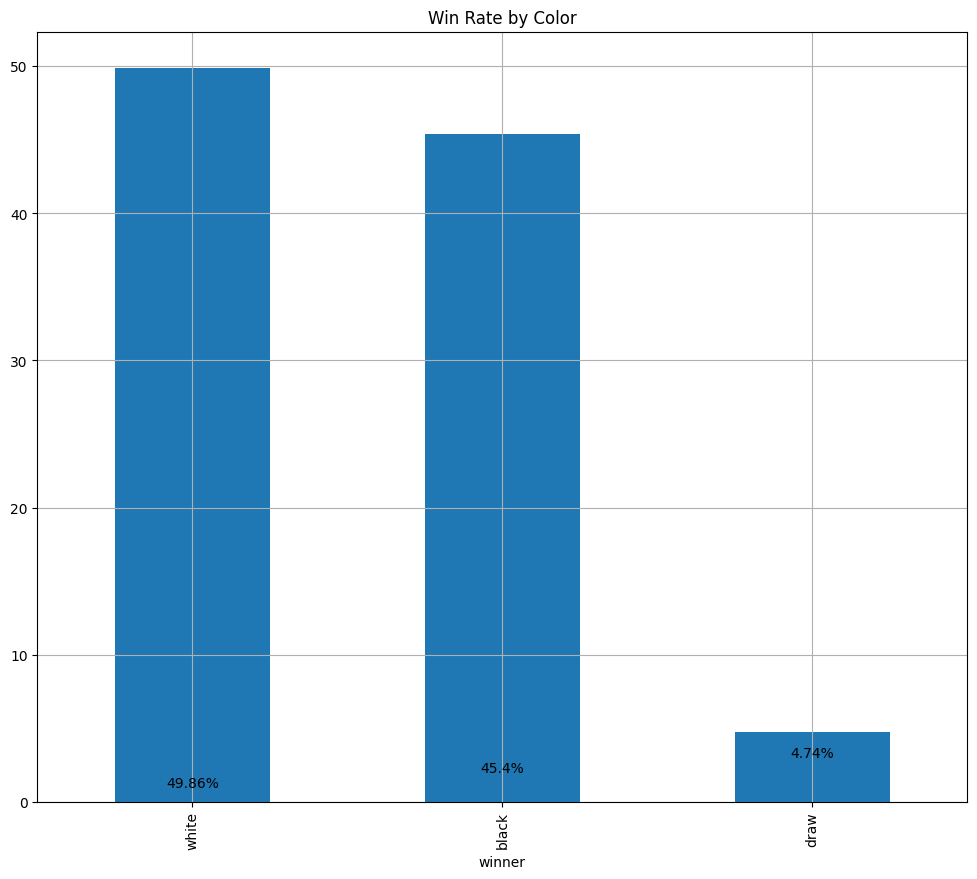

In [8]:
#win rate based on color
winners = round(data['winner'].value_counts(normalize=True) * 100, 2)
winners.plot(kind='bar', figsize=(12, 10))

#add labels to the top of the bars
for i in range(len(winners)):
    plt.text(i, i+1, f"{winners[i]}%", ha="center")

plt.title("Win Rate by Color")
plt.grid(True)

In [9]:
victory = data[['victory_status', 'winner']].groupby('winner').value_counts()
victory

winner  victory_status
black   resign            5303
        mate              2981
        outoftime          823
draw    draw               906
        outoftime           44
white   resign            5844
        mate              3344
        outoftime          813
Name: count, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_15096\4156652661.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, i+1, victory[i], ha="center")


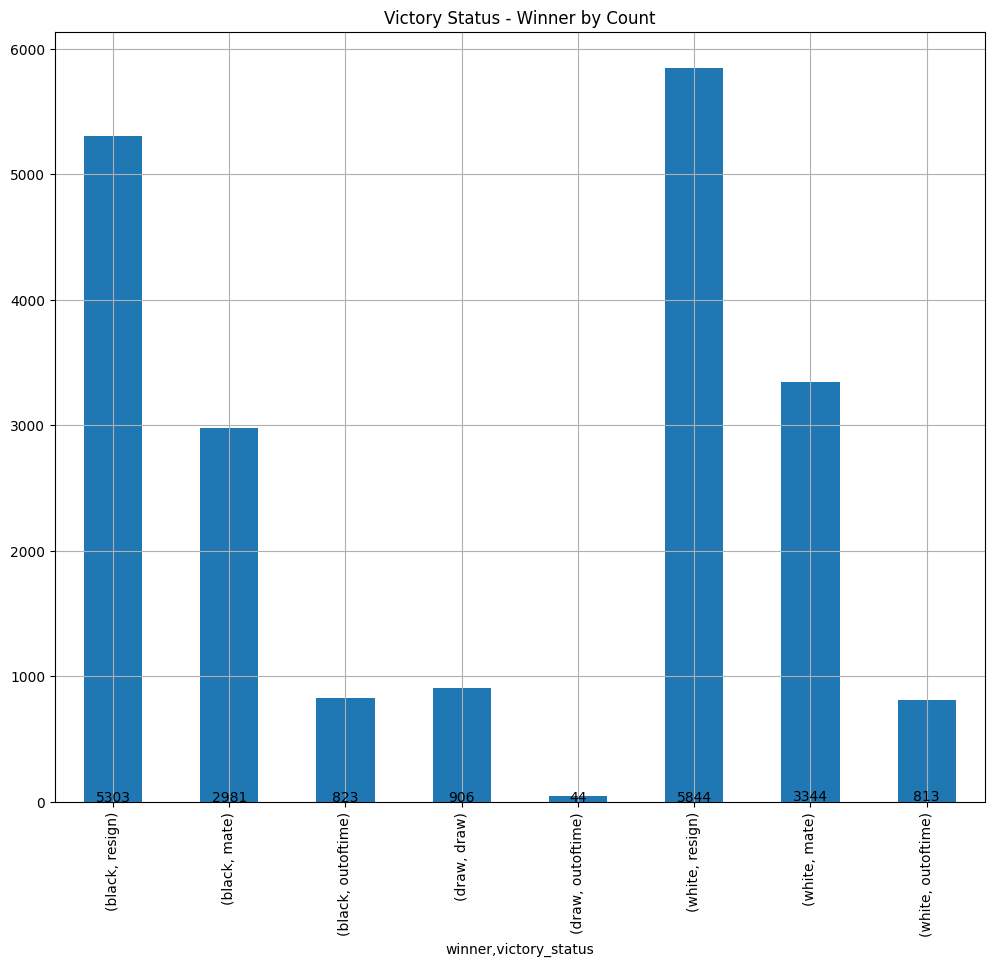

In [10]:
#distribution of victory staus
#victory = data['victory_status'].value_counts()
victory.plot(kind='bar', figsize=(12, 10), title="Victory Status - Winner by Count")

#add labels to the top of the bars
for i in range(len(victory)):
    plt.text(i, i+1, victory[i], ha="center")


plt.grid(True)

From the plot above we can see that the number of wins by resignation is rediculously high, this probably means that resignation is higly correlated to winners.

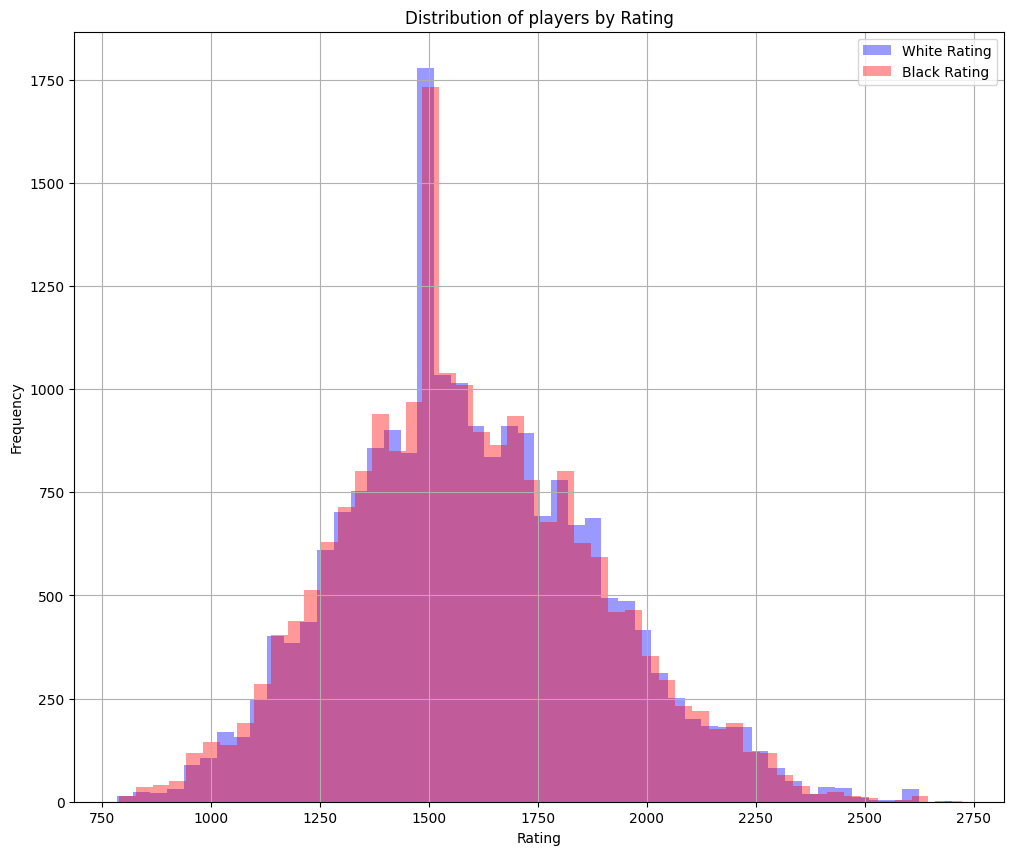

In [11]:
#distribution of players by ratings
plt.figure(figsize=(12, 10))
plt.hist(data['white_rating'], bins=50, color='blue', alpha=0.4, label='White Rating')
plt.hist(data['black_rating'], bins=50, color='Red', alpha=0.4, label='Black Rating')
plt.xlabel('Rating')
plt.ylabel("Frequency")
plt.title('Distribution of players by Rating')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

This plot shows that there is not much rating difference between white and black player ratings, most players are closely rated

In [12]:
#clean the opening column
import re

def clean_opening(opening):
    #split based on #, | and : and pick the first part only
    opening = opening.split('#')[0]
    opening = opening.split('|')[0]
    opening = opening.split(':')[0]
    #sustitute words like Accepted or Decilined or digits with empty strings
    opening = re.sub(r'Game|\d+', '', opening)
    #strip of trailing white speaces
    return opening.strip()

data['opening_name'] = data['opening_name'].apply(clean_opening)

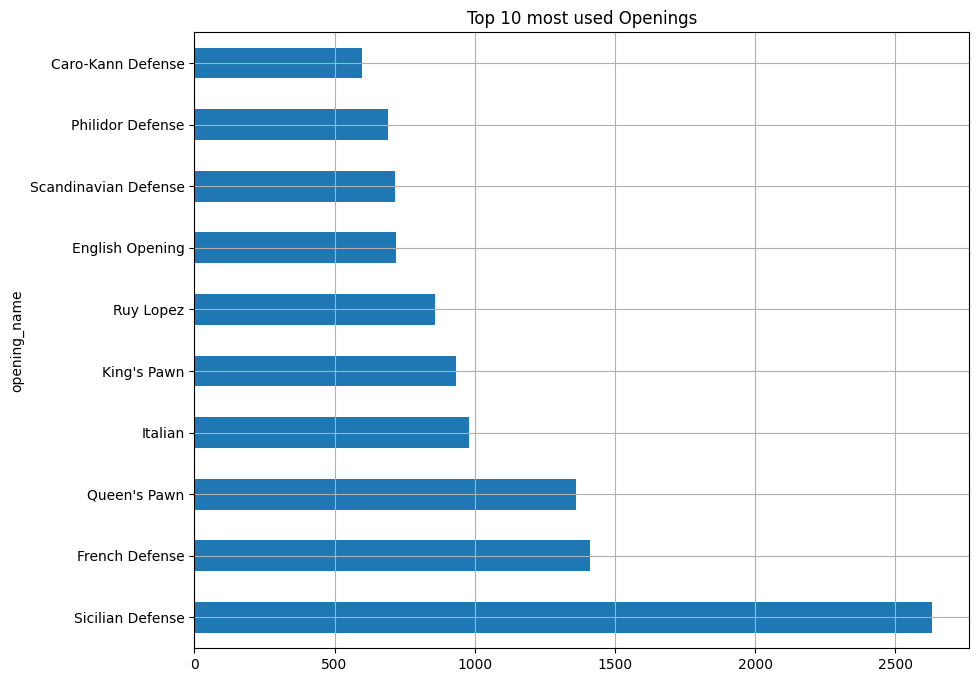

In [13]:
#most common openings
top_10 = data['opening_name'].value_counts().nlargest(10)
top_10.plot(kind='barh', figsize=(10,8))
plt.title("Top 10 most used Openings")
plt.grid(True)

From the visualization above we can conclude that Sicilian Defense is the most common opening in this data set

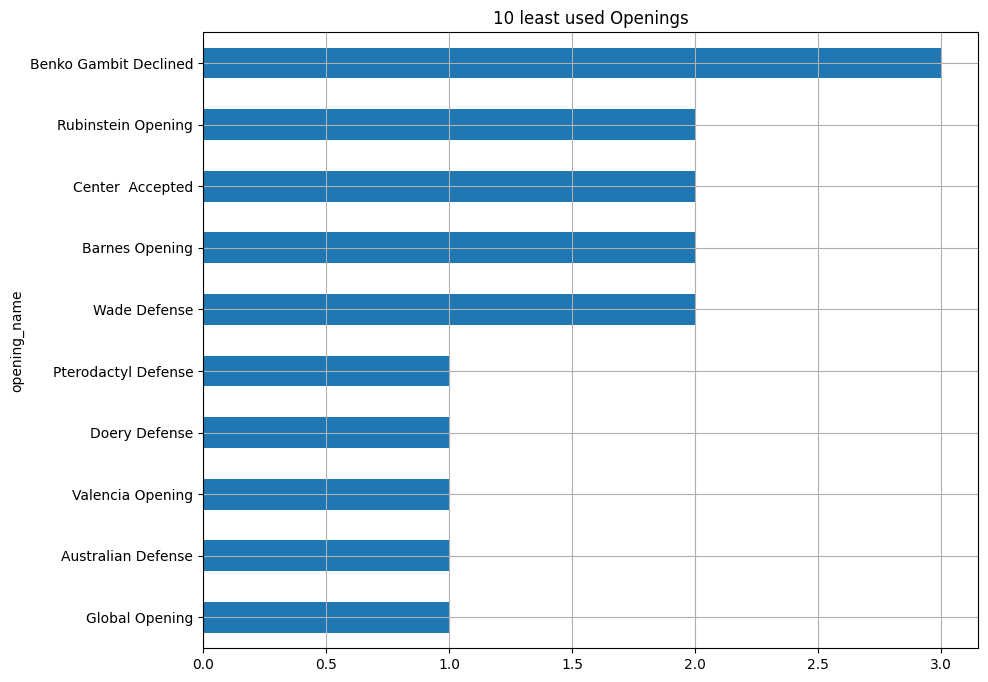

In [14]:
last_10 = data['opening_name'].value_counts().nsmallest(10)
last_10.plot(kind='barh', figsize=(10,8))
plt.title("10 least used Openings")
plt.grid(True)

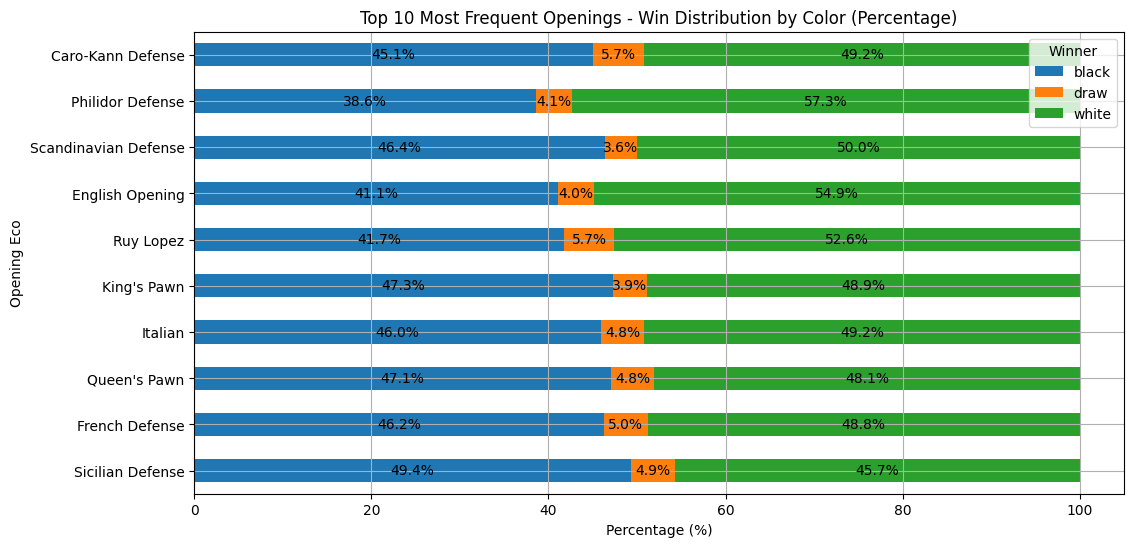

In [15]:
openings_by_color = data.groupby(['opening_name', 'winner']).size().unstack(fill_value=0)

#filter the index of the top 10 most common openings
top_openings_by_color = openings_by_color.loc[openings_by_color.sum(axis=1).nlargest(10).index]

# Calculate percentage for each winner category within each opening
#.div() performs division of the row by the total number in the whole dtaframe
top_openings_by_color_percentage = top_openings_by_color.div(top_openings_by_color.sum(axis=1), axis=0) * 100


ax = top_openings_by_color_percentage.plot(kind='barh', stacked=True, figsize=(12, 6))


for i in range(len(top_openings_by_color_percentage)):
    cumulative_sum = 0  # This will keep track of the cumulative sum for each bar
    for j, winner in enumerate(top_openings_by_color_percentage.columns):
        width = top_openings_by_color_percentage.iloc[i, j]  # The percentage value for this segment
        if width > 0:  # Only annotate non-zero values
            ax.annotate(f'{width:.1f}%', 
                        xy=(cumulative_sum + width / 2, i),  # Position at the middle of the segment
                        ha='center', va='center')
            cumulative_sum += width  

plt.title('Top 10 Most Frequent Openings - Win Distribution by Color (Percentage)')
plt.xlabel('Percentage (%)')
plt.ylabel('Opening Eco')
plt.grid(True)
plt.legend(title='Winner')
plt.show()

From the visual above, we can denote that the best opening for white seem to be the philidor Defense, followed by English Opening and the best for black is Sicilian Defense follwed by king's Pawn and Queen's pawn opening

C:\Users\HP\AppData\Local\Temp\ipykernel_15096\3479881908.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_turns_victory_status.values, y=avg_turns_victory_status.index, palette="viridis")


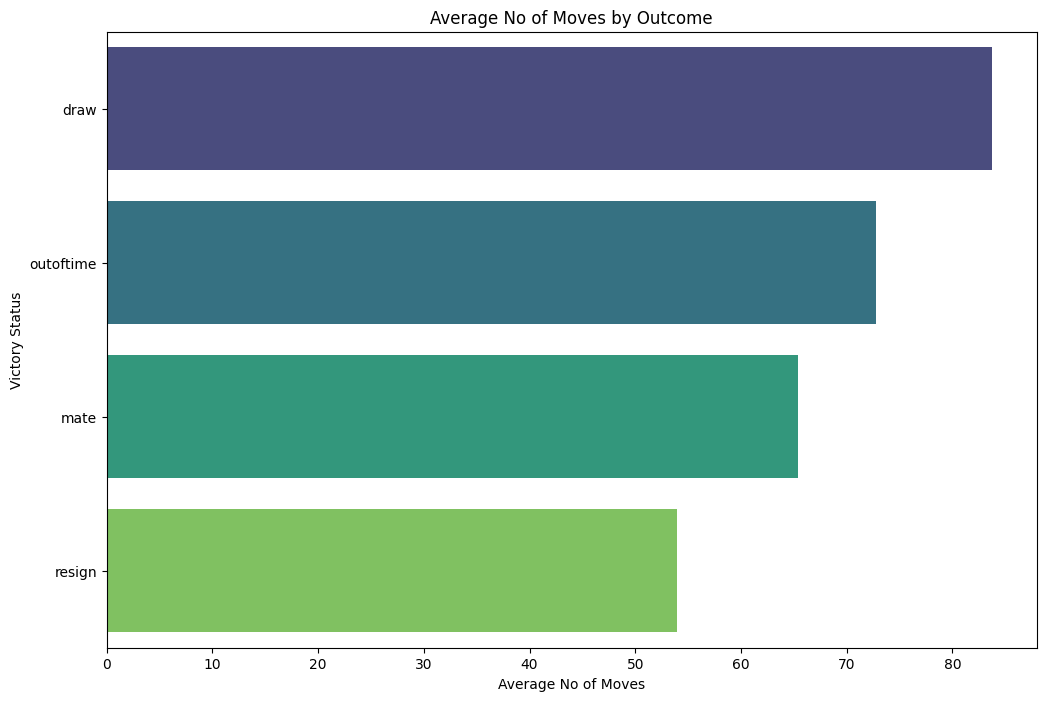

In [16]:
#average turns vs victory status
avg_turns_victory_status = data.groupby(['victory_status'])['turns'].mean().sort_values(ascending=False)

# Plotting the data
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_turns_victory_status.values, y=avg_turns_victory_status.index, palette="viridis")
plt.title("Average No of Moves by Outcome")
plt.xlabel("Average No of Moves")
plt.ylabel("Victory Status")
plt.show()

Games that end in draw are most likely to have very large number of moves. <br>
this visualization shows that games that end in resignation and mate often have fewer no of moves  while games that end in draw have longer number of moves and.
Most games, except those that end in resignation often have at least 50 moves before the end of the game.

In [17]:
#opeinn preferred by top players
#set the threshold for top-rated players
rating_threshold = 2000

#filter for rating threshold
top_rated_players = data[(data['white_rating'] > rating_threshold) | (data['black_rating'] > rating_threshold)]

#count the number of time each opening was used
top_openings = top_rated_players['opening_name'].value_counts().nlargest(10)

C:\Users\HP\AppData\Local\Temp\ipykernel_15096\1620923472.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_openings.head(10).values, y=top_openings.head(10).index, palette='coolwarm')


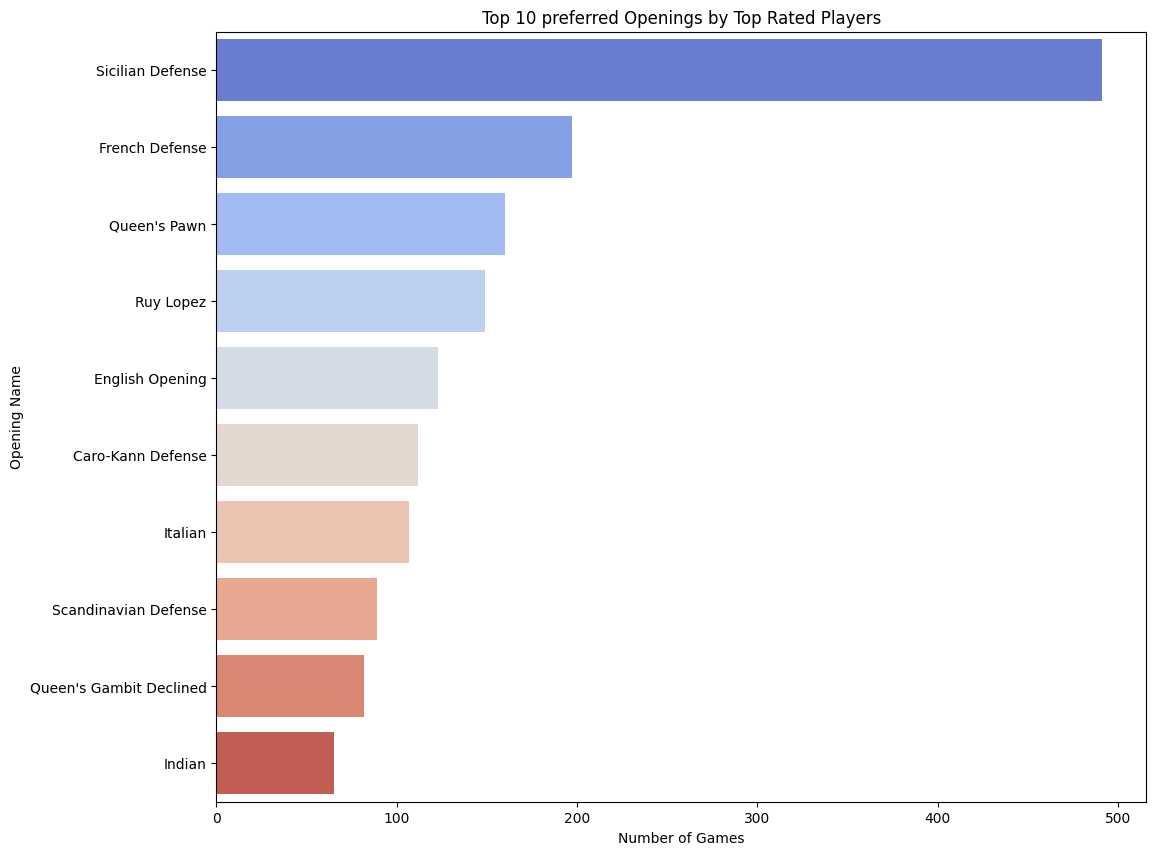

In [18]:
#visualize the opening preferred byt top players

plt.figure(figsize=(12, 10))
sns.barplot(x=top_openings.head(10).values, y=top_openings.head(10).index, palette='coolwarm')
plt.title('Top 10 preferred Openings by Top Rated Players')
plt.xlabel('Number of Games')
plt.ylabel('Opening Name')
plt.show()

Sicilian Defense is the most preferred opening by top rated players

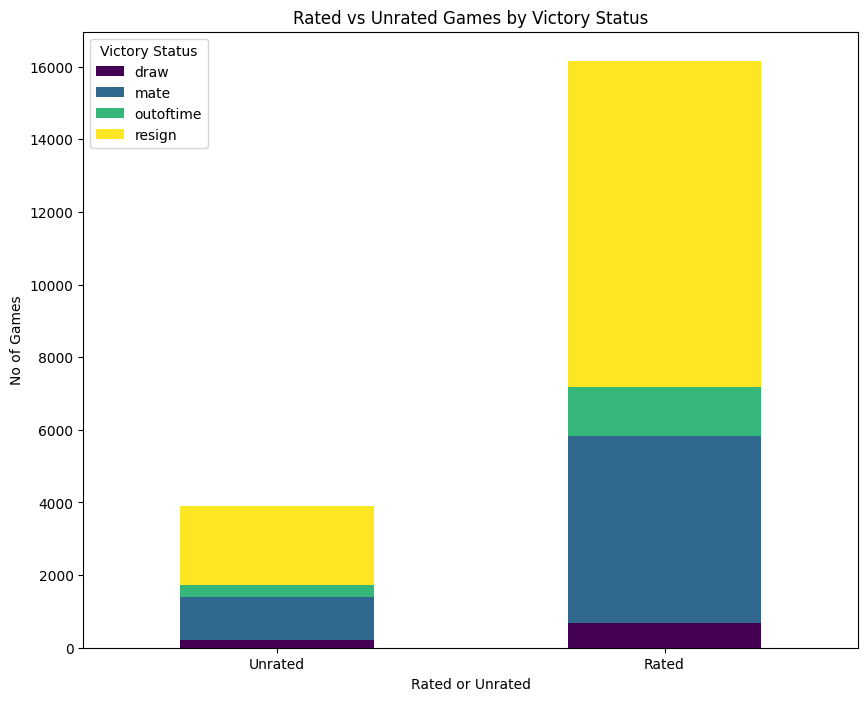

In [19]:
#rated games vs victory status
#group the data

rated_vs_victory = data.groupby(['rated', 'victory_status']).size().unstack(fill_value=0)
rated_vs_victory.plot(kind='bar', stacked=True, figsize=(10, 8), colormap='viridis')
plt.title('Rated vs Unrated Games by Victory Status')
plt.xlabel('Rated or Unrated')
plt.ylabel('No of Games')
plt.xticks(ticks=[0,1], labels=['Unrated', 'Rated'], rotation=0)
plt.legend(title='Victory Status', loc='upper left')
plt.show()

In [20]:
data['rating_difference'] = data['white_rating'] - data['black_rating']

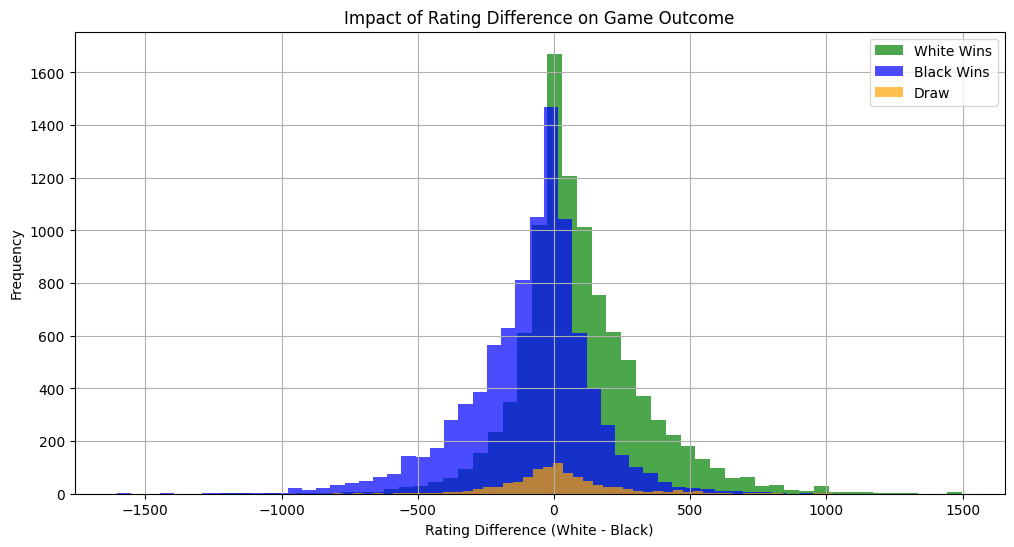

In [21]:
# Plot rating difference based on winner
plt.figure(figsize=(12, 6))
data[data['winner'] == 'white']['rating_difference'].plot(kind='hist', bins=50, alpha=0.7, label='White Wins', color='green')
data[data['winner'] == 'black']['rating_difference'].plot(kind='hist', bins=50, alpha=0.7, label='Black Wins', color='blue')
data[data['winner'] == 'draw']['rating_difference'].plot(kind='hist', bins=50, alpha=0.7, label='Draw', color='orange')
plt.xlabel('Rating Difference (White - Black)')
plt.ylabel('Frequency')
plt.title('Impact of Rating Difference on Game Outcome')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


This graph shows how the rating difference does not really affect who wins the game, In cases where white rates more, it wins the game but black also win in those cases. With this visual, we cannot conclude on whether or not the rating difference affects the outcome of the game

In [22]:
#correlation between rating and win_rate
data['white_wins'] = data['winner'].apply(lambda x: 1 if x == 'white' else 0) #(0.5 if x =='draw' else 0)
data['black_wins'] = data['winner'].apply(lambda x: 1 if x == 'black' else 0)
data['draw'] = data['winner'].apply(lambda x: 1 if x == 'draw' else 0)

corr_white = data[['white_rating', 'white_wins', 'draw']].corr().iloc[0,1]
corr_black = data[['black_rating', 'black_wins', 'draw']].corr().iloc[0,1]
corr_draw = data[['black_rating', 'black_wins', 'draw']].corr().iloc[0,1]

print(f"White corr: {corr_white}, Black corr: {corr_black}, Draw corr: {corr_draw}")

White corr: 0.12857722569707383, Black corr: 0.15477842518399043, Draw corr: 0.15477842518399043


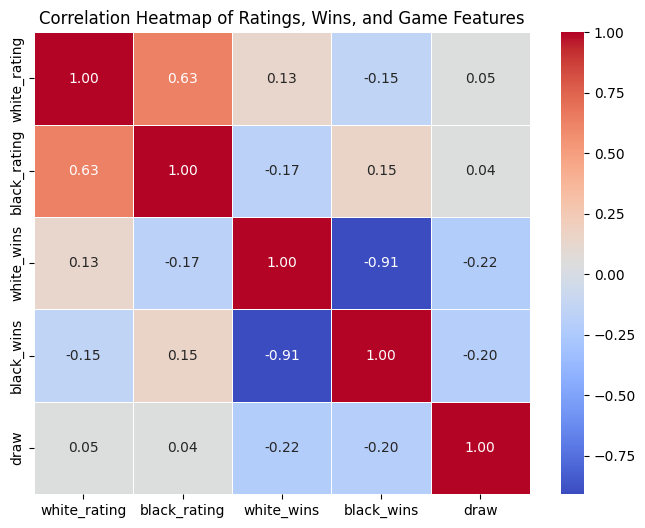

In [23]:
relevant_columns = data[['white_rating', 'black_rating', 'white_wins', 'black_wins', 'draw']]

# Calculate the correlation matrix
correlation_matrix = relevant_columns.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Ratings, Wins, and Game Features')
plt.show()

Black rating being correlated to white rating means that players with similar ratings are often paired together. <br>
White wins is weakly correlated to White rating, this implies that the rating of white players does not necessarily affect the outcome of the game same goes for black wins and black rating and vice versa. <br>
Black wins and white wins are strongly negatively correlated, this means that when black wins, white doesn't and vice versa.<br>
Draw is also not strongly correlated to any of the cols in the visual


<h3>Feature Engineering<h3>

In [24]:
#split the time increment column into two columns
data[['game_time', 'time_increment_per_move']] = data['time_increment'].str.split('+', expand=True)

#change the type of time increment per move and game time
data['time_increment_per_move'] = data['time_increment_per_move'].astype(int)
data['game_time'] = data['game_time'].astype(int)

#get the estimated game duration based on the game time and the time increment
data['estimated_game_duration'] = (data['game_time'] * 60)  + (data['time_increment_per_move'] * data['turns'])

#check the first two rows of the data
data.head(2)

,rated,start_time,end_time,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,...,opening_eco,opening_name,opening_ply,rating_difference,white_wins,black_wins,draw,game_time,time_increment_per_move,estimated_game_duration
game_id,,,,,,,,,,,,,,,,,,,,,
TZJHLljE,False,1504210000000,1504210000000,13,outoftime,white,15+2,bourgris,1500,a-00,...,D10,Slav Defense,5,309,1,0,0,15,2,926
l1NXvwaE,True,1504130000000,1504130000000,16,resign,black,5+10,a-00,1322,skinnerua,...,B00,Nimzowitsch Defense,4,61,0,1,0,5,10,460


In [25]:
#classify time control into game type
def classify_time_control(row):
    if row['game_time'] <= 2 and row['time_increment_per_move'] <= 1:
        return 'bullet'
    elif row['game_time'] <= 10 and row['time_increment_per_move'] <= 5:
        return 'blitz'
    elif row['game_time'] <= 15 and row['time_increment_per_move'] <= 10:
        return 'rapid'
    else:
        return 'classical'
    
data['time_control_type'] = data.apply(classify_time_control, axis=1)
data.head(2)

,rated,start_time,end_time,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,...,opening_name,opening_ply,rating_difference,white_wins,black_wins,draw,game_time,time_increment_per_move,estimated_game_duration,time_control_type
game_id,,,,,,,,,,,,,,,,,,,,,
TZJHLljE,False,1504210000000,1504210000000,13,outoftime,white,15+2,bourgris,1500,a-00,...,Slav Defense,5,309,1,0,0,15,2,926,rapid
l1NXvwaE,True,1504130000000,1504130000000,16,resign,black,5+10,a-00,1322,skinnerua,...,Nimzowitsch Defense,4,61,0,1,0,5,10,460,rapid


Text(0.5, 1.0, 'Distribution of Game types by Time Control')

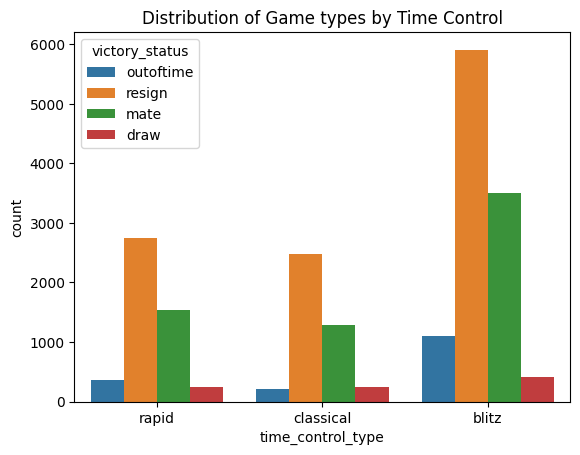

In [26]:
#distribution of time control type
sns.countplot(data, x='time_control_type', hue='victory_status')
plt.title("Distribution of Game types by Time Control")

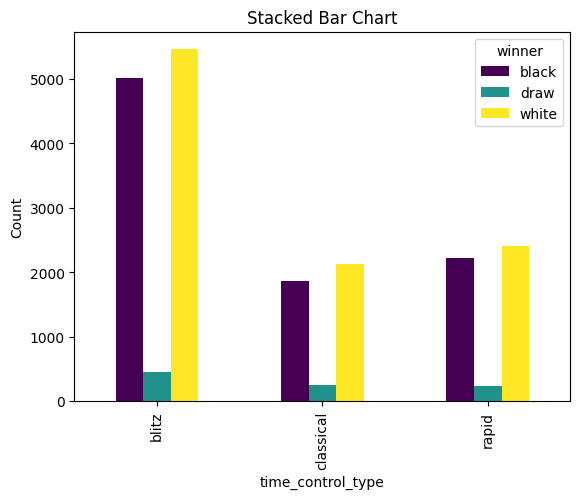

In [27]:
#victory outcome by time control
crosstab = pd.crosstab(data['time_control_type'], data['winner'])

# Stacked bar plot
crosstab.plot(kind='bar', stacked=False, colormap='viridis')
plt.title('Stacked Bar Chart')
plt.ylabel('Count')
plt.show()

For Blitz game, white wins are more common here than black wins, this is the same across all time control types.


In [28]:
redundant_cols = ['start_time', 'end_time', 'time_increment', 'white_wins', 'black_wins', 'draw', 'black_id', 'white_id']
data.drop(columns=redundant_cols, axis=1, inplace=True)
data.columns

Index(['rated', 'turns', 'victory_status', 'winner', 'white_rating',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply',
       'rating_difference', 'game_time', 'time_increment_per_move',
       'estimated_game_duration', 'time_control_type'],
      dtype='object')

In [29]:
data['rated'] = data['rated'].apply(lambda x: 1 if x == True else 0)
data.rated.value_counts()

rated
1    16155
0     3903
Name: count, dtype: int64

In [31]:
#extracting features from the moves column of the data
moves = data['moves']

#function to extract features for each color from the moves column
def extract_features(moves):
    moves_list = moves.split() #split the elements of the moves column into a list
    #moves_list.pop('#')
    white_moves = moves_list[::2] #even indexed moves list to get white moves
    black_moves = moves_list[1::2] #odd indexed moves

    features = {
        'white_captures' : sum('x' in move for move in white_moves),
        'black_captures' : sum('x' in move for move in black_moves),
        'white_checks' : sum('+' in move for move in white_moves),
        'black_checks' : sum('+' in move for move in black_moves),
        'white_promotions' : sum('=' in move for move in white_moves),
        'black_promotions' : sum('=' in move for move in black_moves)
    }

    return pd.Series(features)

#apply to the moves column
moves_extracted = moves.apply(extract_features)

In [32]:
moves_extracted.head()

,white_captures,black_captures,white_checks,black_checks,white_promotions,black_promotions
game_id,,,,,,
TZJHLljE,2,1,0,1,0,0
l1NXvwaE,2,3,1,1,0,0
mIICvQHh,14,3,8,0,0,0
kWKvrqYL,10,4,12,0,0,0
9tXo1AUZ,14,10,4,4,1,0


In [33]:
#join the extracted moves features to the chess data
data = pd.concat([data, moves_extracted], axis=1)
data.head()

,rated,turns,victory_status,winner,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply,...,game_time,time_increment_per_move,estimated_game_duration,time_control_type,white_captures,black_captures,white_checks,black_checks,white_promotions,black_promotions
game_id,,,,,,,,,,,,,,,,,,,,,
TZJHLljE,0,13,outoftime,white,1500,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense,5,...,15,2,926,rapid,2,1,0,1,0,0
l1NXvwaE,1,16,resign,black,1322,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense,4,...,5,10,460,rapid,2,3,1,1,0,0
mIICvQHh,1,61,mate,white,1496,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn,3,...,5,10,910,rapid,14,3,8,0,0,0
kWKvrqYL,1,61,mate,white,1439,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn,3,...,20,0,1200,classical,10,4,12,0,0,0
9tXo1AUZ,1,95,mate,white,1523,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,...,30,3,2085,classical,14,10,4,4,1,0


Natural Language Processing(NLP)

In [39]:
#n_grams hashing to capture move patterns
from sklearn.feature_extraction.text import HashingVectorizer

hasher = HashingVectorizer(n_features=1, ngram_range=(2,2)) #n_features = 1 for a single hash score.
data['moves_hashed'] = hasher.fit_transform(data['moves']).toarray().flatten()
data['moves_hashed']

game_id
TZJHLljE    0.0
l1NXvwaE    1.0
mIICvQHh    1.0
kWKvrqYL   -1.0
9tXo1AUZ    1.0
           ... 
EfqH7VVH    0.0
WSJDhbPl    0.0
yrAas0Kj    1.0
b0v4tRyF   -1.0
N8G2JHGG   -1.0
Name: moves_hashed, Length: 20058, dtype: float64

Pros and Cons <br>
Pros:<br>
Captures sequences of moves without high dimensionality.<br>
Works with very large datasets due to fixed-length output.<br>
Cons:<br>
Hashing may cause some collisions (different sequences mapping to the same hash).<br>
Doesn't retain the exact moves; only a hashed representation.<br>

Train Test Split

In [40]:
from sklearn.model_selection import train_test_split
y = data['winner']
X = data.drop(columns=['winner', 'moves'], axis=1)

In [41]:
y.value_counts()

winner
white    10001
black     9107
draw       950
Name: count, dtype: int64

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3, shuffle=True, stratify=y)

In [43]:
#encoding the data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [44]:
#encoding the target data
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
y_train_encoded

array([2, 2, 2, ..., 2, 2, 0])

Data Encoding for High Caardinality Cols

In [46]:
#separate the numeric and the object cols
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
cat_cols

['victory_status', 'opening_eco', 'opening_name', 'time_control_type']

In [51]:
#join the cat cols to the num cols
num_cols = X_train.select_dtypes(include=['number']).columns.tolist()
num_cols

['rated',
 'turns',
 'white_rating',
 'black_rating',
 'opening_ply',
 'rating_difference',
 'game_time',
 'time_increment_per_move',
 'estimated_game_duration',
 'white_captures',
 'black_captures',
 'white_checks',
 'black_checks',
 'white_promotions',
 'black_promotions',
 'moves_hashed']

In [47]:
from category_encoders.target_encoder import TargetEncoder
target_encoder = TargetEncoder(cols=cat_cols).fit(X_train, y_train_encoded)
X_train_encoded = target_encoder.transform(X_train)
X_test_encoded = target_encoder.transform(X_test)

In [55]:
from imblearn.over_sampling import SMOTE

#oversampling for class imbalance
smote = SMOTE( random_state=42)
X_res, y_res = smote.fit_resample(X_train_encoded, y_train_encoded)

In [ ]:
#count the num of unique values in y_res
import numpy as np
y_i, count = np.unique(y_res, return_counts=True)
print(np.asarray((y_i, count)).T)

[[   0 6854]
 [   1 6854]
 [   2 6854]]


In [57]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, log_loss, classification_report,make_scorer, r2_score
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel

In [58]:
# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),  # Scale numerical features
    ]
)

In [59]:
#define a range of paramter for C (Alpha equivalent)
param_grid = {
    "feature_selection__estimator__C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], #l1 regularization for feature selection
    "classification__C": [0.0001,0.001, 0.01, 0.1, 1, 10, 100], #l1 regularization for classification
}

#number of folds 
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the pipeline
pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),  # Preprocessing step
    ("feature_selection", SelectFromModel(LogisticRegression(
        penalty="l2", solver="saga", max_iter=1000, random_state=42))),  # Lasso for feature selection
    ("classification", LogisticRegression(
        penalty="l2", 
        solver="saga", 
        multi_class="multinomial", 
        max_iter=1000, 
        random_state=42))  # Logistic Regression for classification
])


In [60]:
#define the log loss scoring metric
log_loss_scorer = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

# Perform Grid Search
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring=log_loss_scorer,  # Use an appropriate scoring metric
    cv=kf,                # Number of cross-validation folds
    n_jobs=-1 ,           # Use all available cores
    verbose=1
)

# Fit the grid search on your training data
grid_search.fit(X_train_encoded, y_train_encoded)

# Best parameters and performance
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Score:", grid_search.best_score_)

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


Fitting 5 folds for each of 49 candidates, totalling 245 fits
Best Parameters: {'classification__C': 1, 'feature_selection__estimator__C': 0.0001}
Best Cross-Validated Score: -0.5357988341434666


In [61]:
#get the best parameters
best_params = grid_search.best_params_

#set the best paramters for the pipeline
pipeline.set_params(**best_params)

# Fit the model
pipeline.fit(X_train_encoded, y_train_encoded)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['rated', 'turns',
                                                   'white_rating',
                                                   'black_rating',
                                                   'opening_ply',
                                                   'rating_difference',
                                                   'game_time',
                                                   'time_increment_per_move',
                                                   'estimated_game_duration',
                                                   'white_captures',
                                                   'black_captures',
                                                   'white_checks',
                                                   'black_checks',
                                                   'white_promotions',
                                                   'black_promotions',
                                                   'moves_hashed'])])),
                ('feature_selection',
                 SelectFromModel(estimator=LogisticRegression(C=0.0001,
                                                              max_iter=1000,
                                                              random_state=42,
                                                              solver='saga'))),
                ('classification',
                 LogisticRegression(C=1, max_iter=1000,
                                    multi_class='multinomial', random_state=42,
                                    solver='saga'))])

In [71]:
from sklearn.metrics import log_loss
# Predict and evaluate
y_pred = pipeline.predict(X_test_encoded)
y_pred_proba = pipeline.predict_proba(X_test_encoded)
mse = mean_squared_error(y_test_encoded, y_pred)
r2 = r2_score(y_test_encoded, y_pred)
report = classification_report(y_test_encoded, y_pred)
log_loss_value = log_loss(y_test_encoded, y_pred_proba)
print(f"MSE: {mse}")
print(f"R Squared: {r2}")
print(f"Classification Report: \n{report}")
print(f"Log loss: {log_loss_value}")

MSE: 0.6468926553672316
R Squared: 0.3195216927625747
Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      2732
           1       1.00      0.94      0.97       285
           2       0.83      0.85      0.84      3001

    accuracy                           0.84      6018
   macro avg       0.88      0.87      0.88      6018
weighted avg       0.84      0.84      0.84      6018

Log loss: 0.3956510946682321


In [63]:
# Feature importance
selected_model = pipeline.named_steps["feature_selection"].estimator_
feature_names = X_train_encoded.columns.tolist()
coefficients = np.sum(np.abs(selected_model.coef_), axis=0)
important_feature_indices = np.where(coefficients != 0)[0]
important_features = [feature_names[i] for i in important_feature_indices]
print(f"Important Features: {important_features}")

Important Features: ['rated', 'turns', 'victory_status', 'white_rating', 'black_rating', 'opening_eco', 'opening_name', 'opening_ply', 'rating_difference', 'game_time', 'time_increment_per_move', 'estimated_game_duration', 'time_control_type', 'white_captures', 'black_captures', 'white_checks']


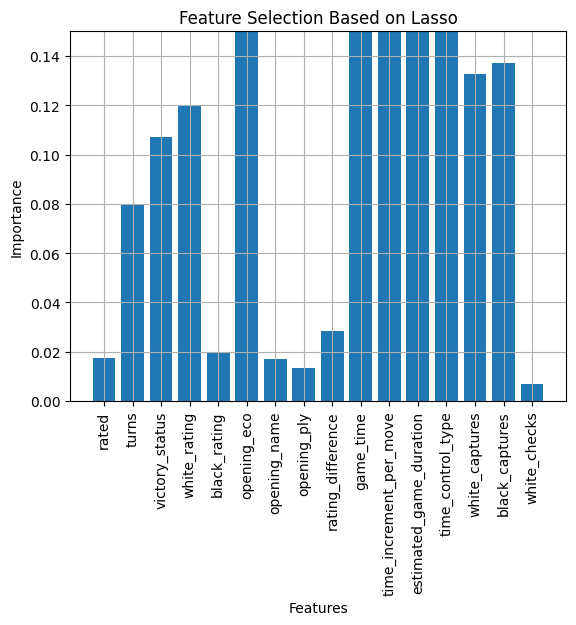

In [64]:
#visualizing the important feature
plt.bar(important_features, coefficients[important_feature_indices])
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(0, 0.15)
plt.show()

From the graph above we can see the important features to the models, the least important features have been removed

In [65]:
# Extract selected features for training and testing
X_train_selected = X_train_encoded[important_features]
X_test_selected = X_test_encoded[important_features]

In [72]:
#retraining the lasso model on th ebest parameter and the important features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), important_features)  # Apply scaling to selected features
    ]
)
# Create the pipeline with Lasso Logistic Regression using the best parameters
pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),  # Assume `preprocessor` is already defined
    ("classification", LogisticRegression(
        penalty="l1", 
        solver="saga", 
        C=best_params.get("classification__C", 1.0),  # Use best C from GridSearch
        multi_class="multinomial", 
        max_iter=1000
    ))
])

# Retrain the pipeline with the selected important features
pipeline.fit(X_train_selected, y_train_encoded)

# Make predictions on the test data
y_pred = pipeline.predict(X_test_selected)

y_pred_proba = pipeline.predict_proba(X_test_selected)

#calculate log loss
log_loss_value = log_loss(y_test_encoded, y_pred_proba)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test_encoded, y_pred))
print(f"Log loss: {log_loss_value}")

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      2732
           1       1.00      0.94      0.97       285
           2       0.83      0.85      0.84      3001

    accuracy                           0.84      6018
   macro avg       0.88      0.87      0.88      6018
weighted avg       0.84      0.84      0.84      6018

Log loss: 0.3956510736257272


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
